In [9]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [10]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [62]:
class_names[9]

'Ankle boot'

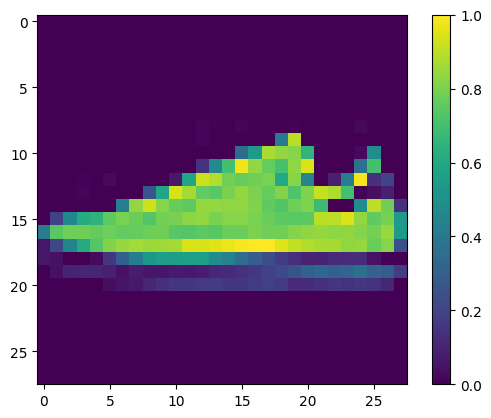

In [56]:
plt.figure()
plt.imshow(train_images[6])
plt.colorbar()
plt.grid(False)
plt.show()

In [23]:
train_images = train_images / 255.0
test_images = test_images / 255.0

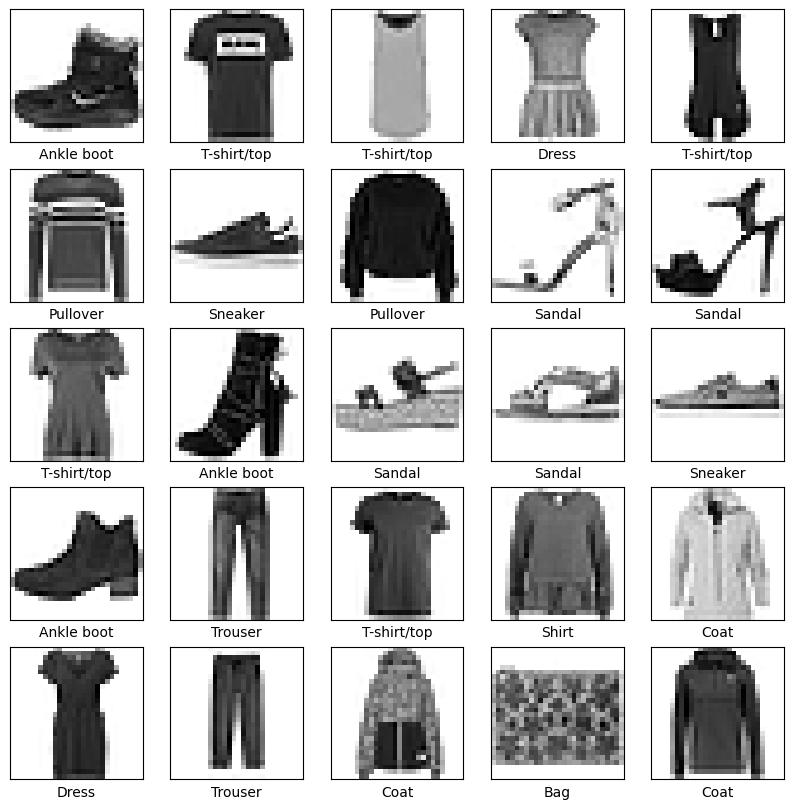

In [33]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [35]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)
    
])

In [39]:
model.compile(optimizer="adam",
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
             )

In [40]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10


1875/1875 [==============================] - 7s 3ms/step - loss: 0.4959 - accuracy: 0.8256
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3751 - accuracy: 0.8638
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3401 - accuracy: 0.8758
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3159 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2977 - accuracy: 0.8900
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2833 - accuracy: 0.8943
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2697 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2600 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2507 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2

In [43]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)

313/313 - 1s - loss: 0.3298 - accuracy: 0.8833 - 604ms/epoch - 2ms/step


In [44]:
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8833000063896179


In [45]:
probability_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [47]:
predictions=probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [58]:
predictions[0]

array([1.6698708e-08, 1.2371525e-07, 5.6288052e-08, 3.8249546e-08,
       3.9423296e-09, 2.3296366e-03, 8.6085652e-07, 1.6975958e-02,
       1.6025930e-06, 9.8069167e-01], dtype=float32)

In [73]:
np.argmax(predictions[0])

9

In [74]:
test_labels[0]

9

In [93]:
x=5

In [96]:
if np.argmax(predictions[x])==test_labels[x]:
    print("Both are same :",test_labels[x])
else:
    print("Both are not same\n")
    print("Predictions :",prediction[x])
    print("Test Labels :",test_labels[x])

Both are same : 1


In [126]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming class_names, predictions, test_labels, and test_images are defined

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    # Correctly get predicted label from the specific prediction array
    predicted_label = np.argmax(predictions_array[i])

    # Set color to blue if correct, red if wrong
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                  100 * np.max(predictions_array[i]),
                                  class_names[true_label]),
                                  color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array[i], color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array[i])

    # Highlight the correct and predicted bars
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

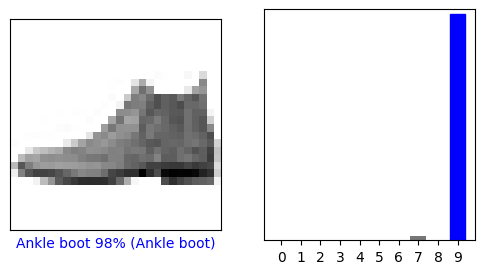

In [135]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

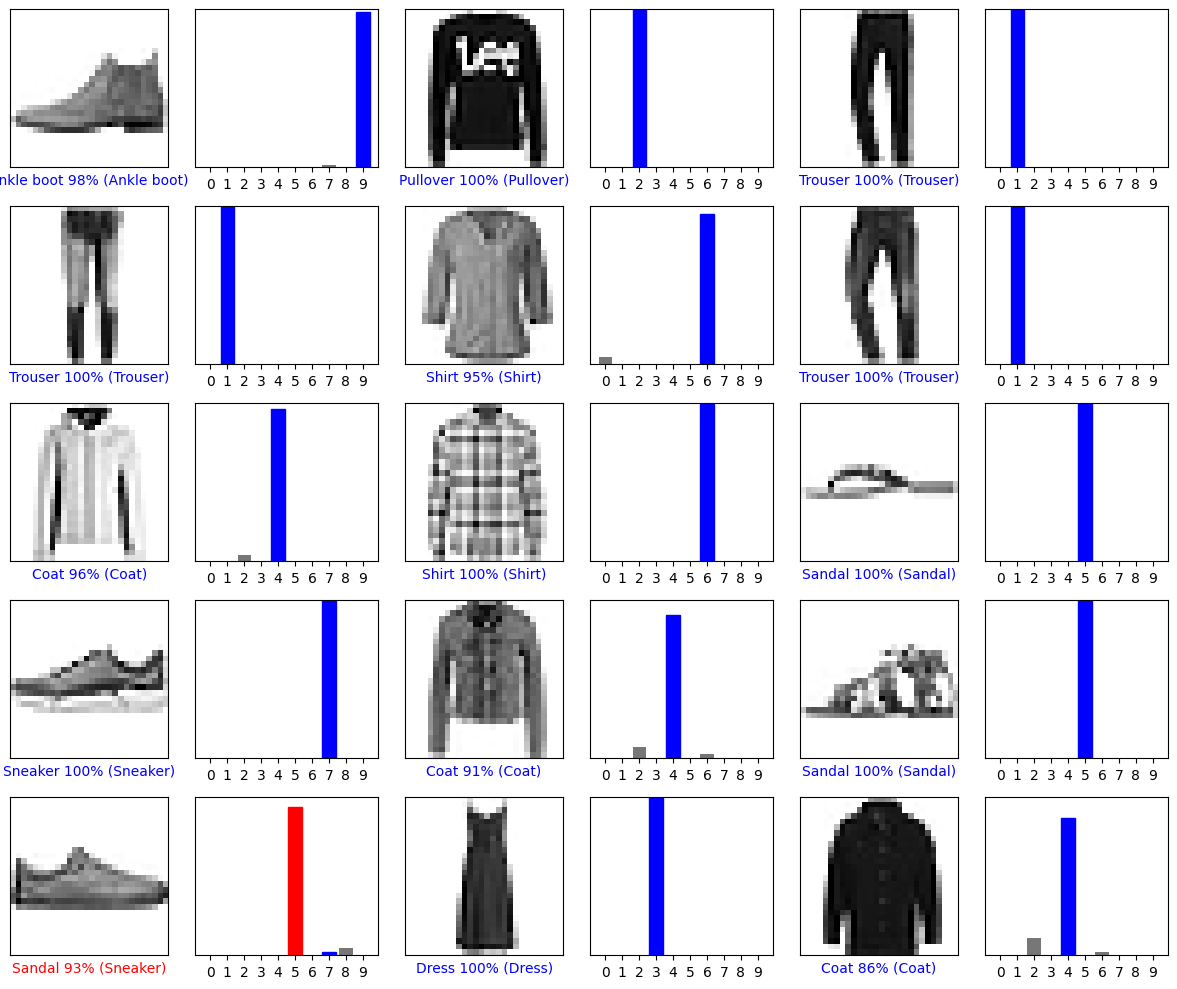

In [128]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, test_labels)
plt.tight_layout()
plt.show()